# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('creditcard.csv', index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape


(284807, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Данные обрабатывать вроде не необходимо 

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, r2_score, log_loss
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(Y.loc[Y==1].shape, Y.loc[Y==0].shape)

(492,) (284315,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
# contant (так как 0 значительно больше, то сделаем массив из 0 )
y_pred_proba_const = np.zeros(len(X_test))

In [11]:
# LogReg
LogReg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = LogReg.predict(X_test)
y_pred_proba_log_reg = LogReg.predict_proba(X_test)[:, 1] # возьмем только вероятность 1  обьекта 


In [12]:
# knn
knn = KNeighborsClassifier(n_neighbors=5) # выберем K=5 например
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred_knn = knn.predict(X_test)

In [14]:
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# ТЕПЕРЬ СРАВНИМ ВСЕ ЭТО 

In [15]:
# accuracy score
print('LogReg:', accuracy_score(y_test, y_pred_log_reg))
print('KNN:', accuracy_score(y_test, y_pred_knn))
print('CONST:', accuracy_score(y_test, y_pred_proba_const))

LogReg: 0.9992860737567735
KNN: 0.9992860737567735
CONST: 0.9984082955888721


In [16]:
# precision_score
print('LogReg:', precision_score(y_test, y_pred_log_reg))
print('KNN:', precision_score(y_test, y_pred_knn))
print('CONST:', precision_score(y_test, y_pred_proba_const))

LogReg: 0.8504672897196262
KNN: 0.9032258064516129
CONST: 0.0


In [17]:
# recall_score
print('LogReg:', recall_score(y_test, y_pred_log_reg))
print('KNN:', recall_score(y_test, y_pred_knn))
print('CONST:', recall_score(y_test, y_pred_proba_const))

LogReg: 0.6691176470588235
KNN: 0.6176470588235294
CONST: 0.0


In [18]:
# f1_score
print('LogReg:', f1_score(y_test, y_pred_log_reg))
print('KNN:', f1_score(y_test, y_pred_knn))
print('CONST:', f1_score(y_test, y_pred_proba_const))

LogReg: 0.7489711934156379
KNN: 0.7336244541484715
CONST: 0.0


In [19]:
# roc_auc__score
print('LogReg:', roc_auc_score(y_test, y_pred_log_reg))
print('KNN:', roc_auc_score(y_test, y_pred_knn))
print('CONST:', roc_auc_score(y_test, y_pred_proba_const))

LogReg: 0.8344650445898171
KNN: 0.8087707787582428
CONST: 0.5


LOGREG - BLUE
KNN - RED
CONST - GREEN


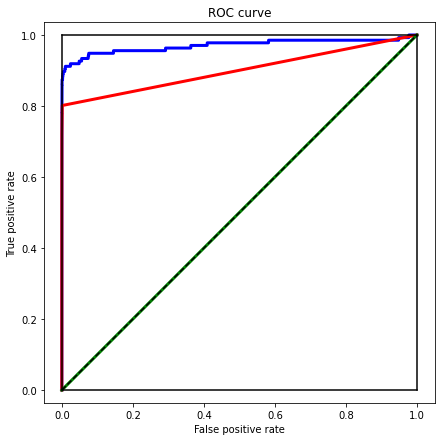

In [20]:
from sklearn.metrics import roc_curve
print('LOGREG - BLUE', 'KNN - RED', 'CONST - GREEN', sep='\n')
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, 'r', linewidth=3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_const)
plt.plot(fpr, tpr, 'g', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Так как у нас очень много пользователей и среди них мало мошенников, то нам важно чтобы ротот банил как можно меньше пользователей, которые не мошенники. Так как забаненные пользователи могут попустить рейтинг компании. Для этого нам лучше растить точность(precision). С другой же стороны не так трудно позже проверить при помощи экспертов является ли операция мошеннической. Но так как робот будет банить автоматически, то ошибки очень сильно не желетальны. По-хорошему, если модель не сильно уверена в своем выборе, надо отправлять такое на проверку, а не автоматически банить.  Как разумный вариант, выберем F0.5. Что-то среднее между precision и recall, c укооном в precision.

# Наш выбор - F0.5

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Переберем параметры C(регуляризация) и отношение весов классов. 

In [21]:
from sklearn.metrics import fbeta_score

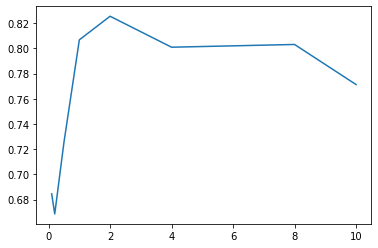

In [25]:
weights = [0.1, 0.2, 0.5, 1, 2, 4, 8, 10]
errors = []
for i in weights:
    logreg = LogisticRegression(class_weight={0:1, 1:i}).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    errors.append(fbeta_score(y_test, y_pred, beta=0.5))
plt.plot(weights, errors)
plt.show()

Ну, нетрудно заметить что 2 подхлдит лучше всех. 

# Теперь переберем коэф. обратной регуляризации. 

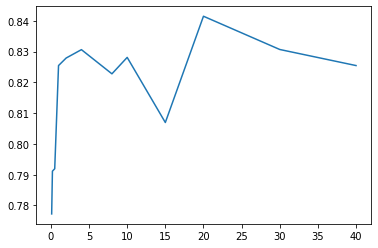

In [26]:
coefs = [0.1, 0.2, 0.5, 1, 2, 4, 8, 10, 15, 20 , 30, 40]
errors = []
for i in coefs:
    logreg = LogisticRegression(C=i, class_weight={0:1, 1:2}).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    errors.append(fbeta_score(y_test, y_pred, beta=0.5))
plt.plot(coefs, errors)
plt.show()

Заметим, что С=20 подходит лучше всего. 

In [27]:
FINAL_logreg = LogisticRegression(C=20, class_weight={0:1, 1:2}).fit(X_train, y_train)
y_pred_final = FINAL_logreg.predict(X_test)
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [28]:
print('our final LogReg:', fbeta_score(y_test, y_pred_final, beta=0.5))
print('Simple LogReg', fbeta_score(y_test, y_pred, beta=0.5))
print('KNN', fbeta_score(y_test, y_pred_knn, beta=0.5))

our final LogReg: 0.8415032679738563
Simple LogReg 0.8067375886524822
KNN 0.826771653543307


Как видим, наша модель выигрывает неплохо так. Конечно, можно было бы перебрать параметр k у knn, но ждать по 5 минут каждую итерацию - не мой вариант. Так что пока так

 # Лeчший резальтат: 0.8415032679738563

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [143]:
data = pd.read_csv('music_genre.csv', index_col=0)
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 50005 entries, 32894.0 to 63470.0
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   track_name        50000 non-null  object 
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  object 
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  object 
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  obtained_date     50000 non-null  object 
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-nu

In [144]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.key)
data['key'] = le.transform(data.key)

le.fit(data['mode'])
data['mode'] = le.transform(data['mode'])

le.fit(data['artist_name'])
data['artist_name'] = le.transform(data['artist_name'])

le.fit(data['track_name'])
data['track_name'] = le.transform(data['track_name'])

In [145]:
def Tempo_Norm(n):
    if n == '?':
        return 120
    else:
        return int(float(n))

In [146]:
data= data.dropna()

In [147]:
data['tempo'] = data['tempo'].apply(Tempo_Norm)

In [148]:
data = data.drop(['obtained_date'], axis=1)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 50000 entries, 32894.0 to 63470.0
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  int32  
 1   track_name        50000 non-null  int32  
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  int32  
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  int32  
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  int64  
 14  valence           50000 non-null  float64
 15  music_genre       50000 non-null  object 
dtypes: float64(10), int32(4), int6

In [171]:
X = data.drop(['music_genre', 'artist_name', 'track_name', 'energy', 'acousticness'], axis=1)
Y = data['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [182]:
from collections import Counter
Counter(y_train)
y_pred_const = ['Rock' for i in range(len(X_test))]

In [219]:
LogReg = LogisticRegression().fit(X_train, y_train)
y_pred_log = LogReg.predict(X_test)

In [199]:
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [207]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [208]:
# accuracy score
print('LogReg:', accuracy_score(y_test, y_pred_log_reg))
print('KNN:', accuracy_score(y_test, y_pred_knn))
print('CONST:', accuracy_score(y_test, y_pred_const))
print('Tree:', accuracy_score(y_test, y_pred_tree))

LogReg: 0.21146666666666666
KNN: 0.1752
CONST: 0.09773333333333334
Tree: 0.4262666666666667


In [209]:
# precision score
print('LogReg:', precision_score(y_test, y_pred_log_reg, average='micro'))
print('KNN:', precision_score(y_test, y_pred_knn, average='micro'))
print('CONST:', precision_score(y_test, y_pred_const, average='micro'))
print('Tree:', precision_score(y_test, y_pred_tree, average='micro'))

LogReg: 0.21146666666666666
KNN: 0.1752
CONST: 0.09773333333333334
Tree: 0.4262666666666667


In [210]:
# precision score
print('LogReg:', precision_score(y_test, y_pred_log_reg, average='macro'))
print('KNN:', precision_score(y_test, y_pred_knn, average='macro'))
print('CONST:', precision_score(y_test, y_pred_const, average='macro'))
print('Tree:', precision_score(y_test, y_pred_tree, average='macro'))

LogReg: 0.1524822731590748
KNN: 0.17616323086694918
CONST: 0.009773333333333334
Tree: 0.42567061637258147


In [211]:
# recall score
print('LogReg:', recall_score(y_test, y_pred_log_reg, average='micro'))
print('KNN:', recall_score(y_test, y_pred_knn, average='micro'))
print('CONST:', recall_score(y_test, y_pred_const, average='micro'))
print('Tree:', recall_score(y_test, y_pred_tree, average='micro'))

LogReg: 0.21146666666666666
KNN: 0.1752
CONST: 0.09773333333333334
Tree: 0.4262666666666667


In [212]:
# recall score
print('LogReg:', recall_score(y_test, y_pred_log_reg, average='macro'))
print('KNN:', recall_score(y_test, y_pred_knn, average='macro'))
print('CONST:', recall_score(y_test, y_pred_const, average='macro'))
print('Tree:', recall_score(y_test, y_pred_tree, average='macro'))

LogReg: 0.21248840466237237
KNN: 0.1749833490446925
CONST: 0.1
Tree: 0.4259285865581153


In [213]:
# f1 score
print('LogReg:', f1_score(y_test, y_pred_log_reg, average='micro'))
print('KNN:', f1_score(y_test, y_pred_knn, average='micro'))
print('CONST:', f1_score(y_test, y_pred_const, average='micro'))
print('Tree:', f1_score(y_test, y_pred_tree, average='micro'))

LogReg: 0.21146666666666666
KNN: 0.1752
CONST: 0.09773333333333334
Tree: 0.4262666666666667


In [214]:
# f1 score
print('LogReg:', f1_score(y_test, y_pred_log_reg, average='macro'))
print('KNN:', f1_score(y_test, y_pred_knn, average='macro'))
print('CONST:', f1_score(y_test, y_pred_const, average='macro'))
print('Tree:', f1_score(y_test, y_pred_tree, average='macro'))

LogReg: 0.17398874819315344
KNN: 0.17202991566753087
CONST: 0.01780638892262845
Tree: 0.4256834330428199


Небольшие выводы: константа, как было очевидно оченб плохо справляется. Лог рег набирает больше чем КНН, но качество сильно снижается если усреднять по макро параметру. 

Лучше всех справилось дерево решений, но 0.4 - тоже далеко от идеала. Тем-более мы его пока не проходили, относительно нечестно

# Но грубо говоря все модели не очень, набирают +- 20% метрик. Это ужас

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем максимизировать accuracy. Так как нам важно только количество правильно распознанных песен. Судьба человечества от этого не зависит, и точность нам тоже не особо важна. Так что бьем в лоб 

# Метрика - accuracy

In [229]:
LogReg = LogisticRegression().fit(X_train, y_train)
y_pred_log = LogReg.predict(X_test)
print('LogReg:', accuracy_score(y_test, y_pred_log))

LogReg: 0.21146666666666666


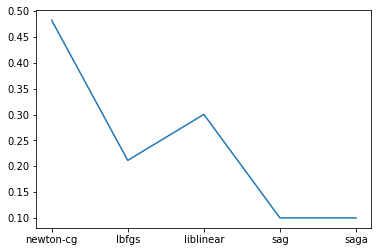

In [227]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
errors = []
for i in solvers:
    logreg = LogisticRegression(solver=i).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    errors.append(accuracy_score(y_test, y_pred))
plt.plot(solvers, errors)
plt.show()

nice-nice

In [232]:
LogReg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
y_pred_log = LogReg.predict(X_test)
print('LogReg:', accuracy_score(y_test, y_pred_log))

LogReg: 0.4822


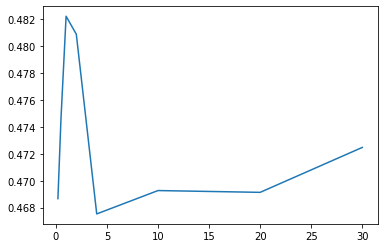

In [233]:
coefs = [ 0.2, 0.5, 1, 2, 4, 10, 20 , 30]
errors = []
for i in coefs:
    logreg = LogisticRegression(C=i, solver='newton-cg').fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    errors.append(accuracy_score(y_test, y_pred))
plt.plot(coefs, errors)
plt.show()

оставляем, как было 

# попробуем KNN

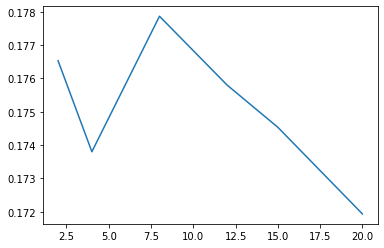

In [236]:
ns = [2, 4, 8, 12, 15, 20]
errors = []
for i in ns:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(accuracy_score(y_test, y_pred))
plt.plot(ns, errors)
plt.show()

Больше из этого выжимать нечего. 

In [237]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Tree:', accuracy_score(y_test, y_pred_tree))

Tree: 0.4202


In [238]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('GINI:', accuracy_score(y_test, y_pred_tree))

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('ENTROPY:', accuracy_score(y_test, y_pred_tree))

GINI: 0.424
ENTROPY: 0.4256666666666667


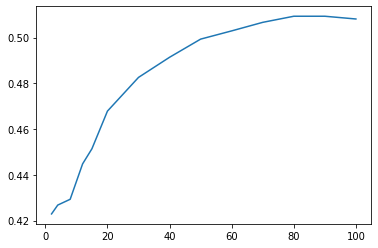

In [245]:
ns = [2, 4, 8, 12, 15, 20, 30, 40, 50 , 60, 70, 80 , 90 , 100]
errors = []
for i in ns:
    tree = DecisionTreeClassifier(min_samples_split=i, criterion='entropy').fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    errors.append(accuracy_score(y_test, y_pred))
plt.plot(ns, errors)
plt.show()

90 - the best

In [242]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=90)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('ENTROPY:', accuracy_score(y_test, y_pred_tree))

ENTROPY: 0.5094


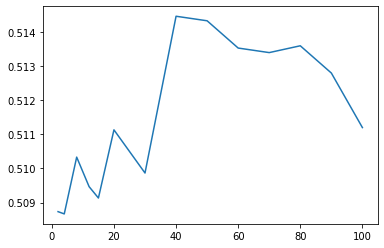

In [244]:
ns = [2, 4, 8, 12, 15, 20, 30, 40, 50 , 60, 70, 80 , 90 , 100]
errors = []
for i in ns:
    tree = DecisionTreeClassifier(min_samples_split=90, criterion='entropy', min_samples_leaf=i).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    errors.append(accuracy_score(y_test, y_pred))
plt.plot(ns, errors)
plt.show()

Незначительные изменения, не будем ничего менять. 

# По итогу для моделей, которые мы проходили лучшая метрика:0.4822 LogisticRegression(solver='newton-cg')
# Но если использовать Decision Tree, то мы можем получить: 0.5094 DecisionTreeClassifier(criterion='entropy', min_samples_split=90)